# Initial Steps

Loading the essential libraries

In [43]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Loading the dataset

In [74]:
# Load dataset & renaming the column names
column_name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", names = column_name)
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Dimensions of dataset

In [49]:
#dimensions
dataset.shape

(150, 5)

Peek at the data

In [50]:
#first 20 rows
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Statistical Summary

In [51]:
#for descriptions
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Class distribution

In [52]:
#for class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization

Plotting univariate plots using box and whiskers

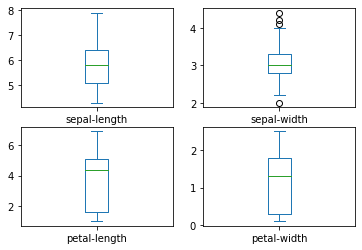

In [105]:
# box and whisker plots
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

Also, plotting histogram as a part of univariate plots

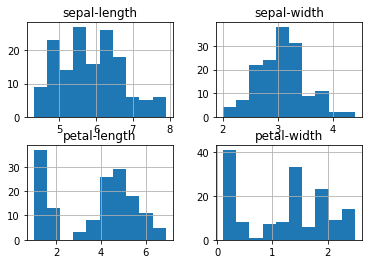

In [98]:
# histograms
dataset.hist()
plt.show()

For multivariate plots, plotting a scatter plot matrix

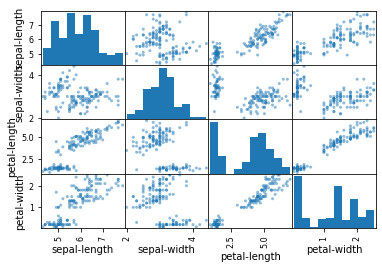

In [100]:
# scatter plot matrix using matplotlib
scatter_matrix(dataset)
plt.show()

Visualizing using Seaborn library

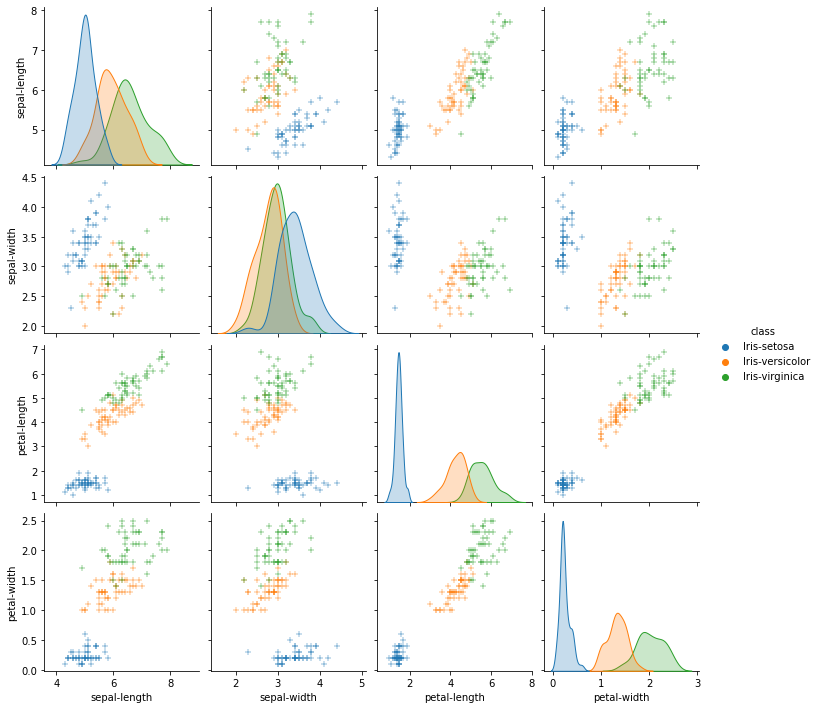

In [103]:
# Visualize the whole dataset
sns.pairplot(dataset, hue = 'class', markers = '+')
plt.show()

Violin plot for checking the comparison of variable distribution

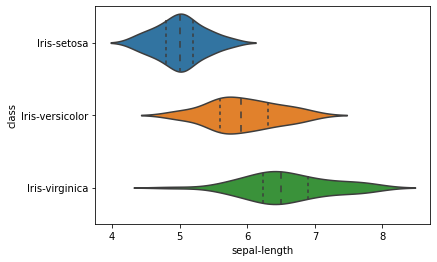

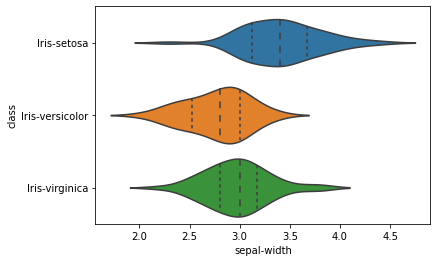

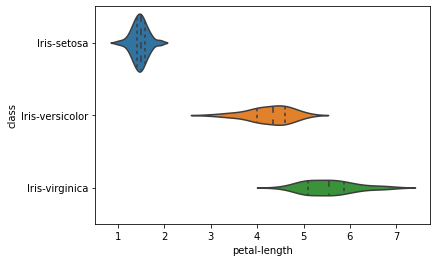

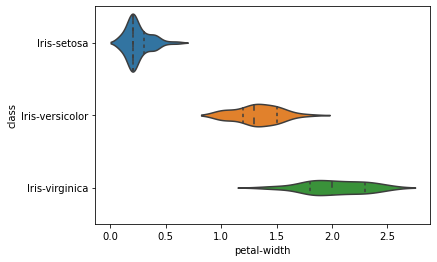

In [107]:
sns.violinplot(y = 'class', x = 'sepal-length', data = dataset, inner = 'quartile')
plt.show()
sns.violinplot(y = 'class', x = 'sepal-width', data = dataset, inner = 'quartile')
plt.show()
sns.violinplot(y = 'class', x = 'petal-length', data = dataset, inner = 'quartile')
plt.show()
sns.violinplot(y = 'class', x = 'petal-width', data = dataset, inner = 'quartile')
plt.show()

Plotting the heatmap to check the correlation

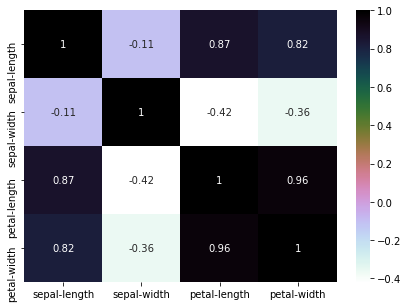

In [109]:
plt.figure(figsize = (7,5))
sns.heatmap(dataset.corr(), annot = True, cmap = 'cubehelix_r')
plt.show()

# Algorithmic Evaluation

Creating a validation dataset

In [62]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


# Building model

Testing 6 different algorithms such as Logistic Regression (LR), Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Gaussian Naive Bayes (NB) and
Support Vector Machines (SVM)

In [28]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.934545 (0.071789)
LDA: 0.971818 (0.043112)
KNN: 0.952727 (0.062430)
CART: 0.953636 (0.046435)
NB: 0.935455 (0.058698)
SVM: 0.980909 (0.038236)


Plotting a boxplot for comparing the algorithms

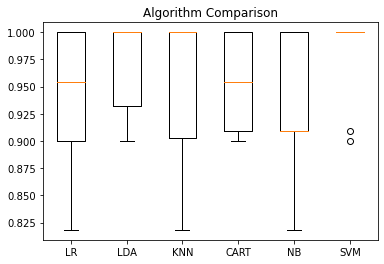

In [111]:
# Compare Algorithms
plt.boxplot(results, labels = names)
plt.title('Algorithm Comparison')
plt.show()

# Predictions

In [30]:
# Make predictions on validation dataset
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

# Evaluation of Predictions

In [32]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9777777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

